<a href="https://colab.research.google.com/github/mohamedelsaka11/House-Price-Prediction/blob/main/MNIST_Handwritten_Digit_Clasification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist  #Database containing handwritten images of numbers from 0 to 9.
from tensorflow.math import confusion_matrix

In [2]:
#Loading data from keras
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# printing the 15th image

print(X_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [7]:
print(X_train[15].shape)

(28, 28)


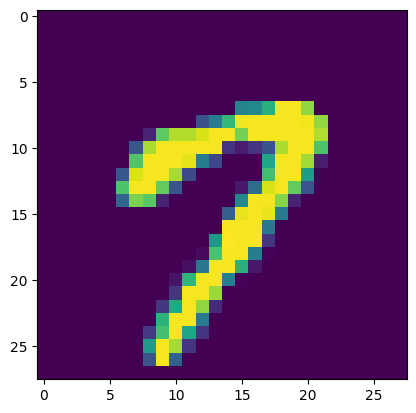

In [8]:
# displaying the image
plt.imshow(X_train[15])
plt.show()

In [9]:
# print the corresponding label
print(Y_train[15])

7


In [10]:
# unique values in Y_train
print(np.unique(Y_train))
# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#Normalization
# data values ​​to a range between 0 and 1 instead of the original range of 0:255
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train[15])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [13]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# training the Neural Network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8504 - loss: 0.5194
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9537 - loss: 0.1556
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9663 - loss: 0.1095
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9734 - loss: 0.0848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9791 - loss: 0.0691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9832 - loss: 0.0570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9856 - loss: 0.0491
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0429
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0365
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9903 - loss: 0.0331


Training data accuracy = 99.02%


In [16]:
# testing the Neural Network3
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9687 - loss: 0.1276
0.9725000262260437


Test data accuracy = 96.93%


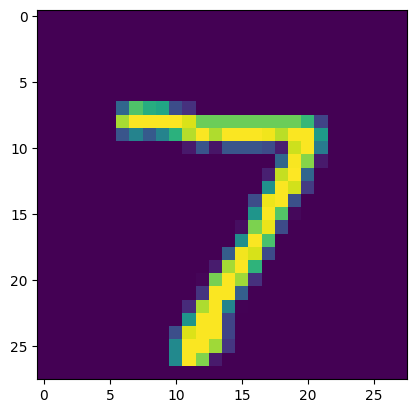

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(Y_pred[0])

[2.9198304e-03 4.3528505e-02 4.6201354e-01 2.6277071e-01 6.3772490e-09
 9.2227077e-03 1.2002032e-08 9.9999946e-01 1.5687774e-03 4.9369675e-01]


In [22]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 8, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusin Matrix

In [23]:
con_mat = confusion_matrix(Y_test, Y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

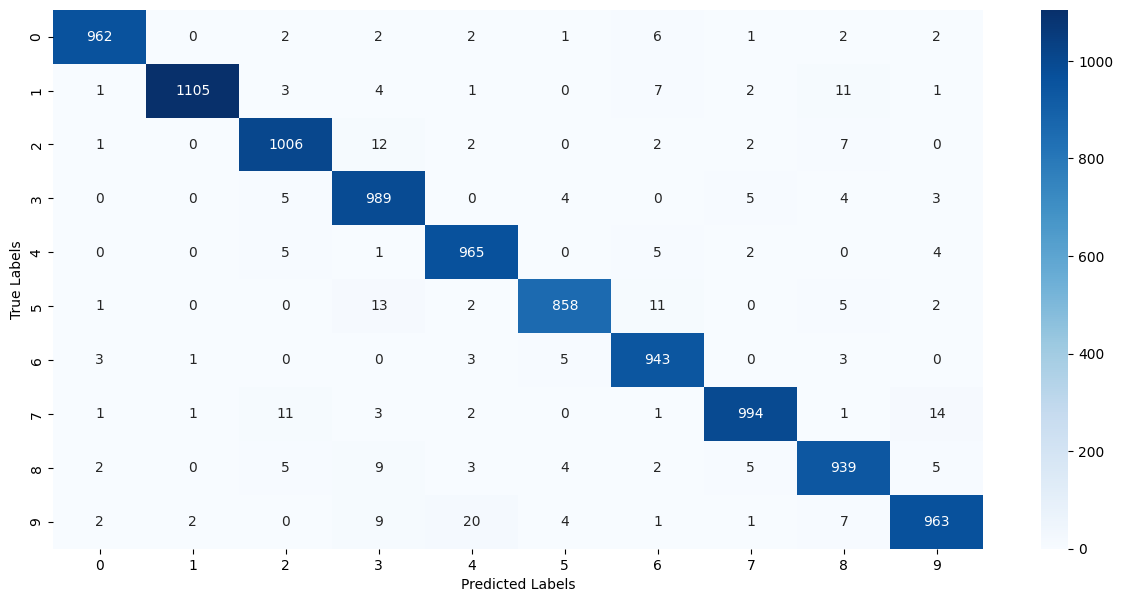

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [27]:
input_image_path = "/content/MNIST_digit.png"

In [29]:
input_image = cv2.imread(input_image_path)

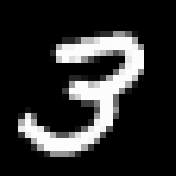

In [30]:
cv2_imshow(input_image)

In [31]:
input_image.shape

(176, 176, 3)

In [32]:
#convert the image to grayscale to suit the model that was trained on this type of image
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(176, 176)

In [34]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [35]:
input_image_resize.shape

(28, 28)

In [36]:
cv2_imshow(input_image_resize)

In [37]:
input_image_resize = input_image_resize/255

In [38]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[7.19900788e-12 1.43000669e-08 1.48538575e-05 1.00000000e+00
  3.50394328e-19 1.69392151e-04 1.46173558e-20 6.47770867e-05
  7.93300271e-02 5.74028600e-05]]


In [42]:
input_pred_label = np.argmax(input_prediction)

In [43]:
print(input_pred_label)

3


Predictive System

Path of the image to be predicted: /content/Minist.jpg


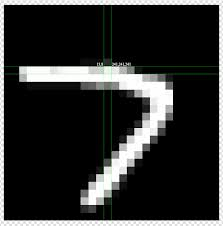

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The Handwritten Digit is recognised as  7


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)